In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [16]:
from tensorflow.keras.layers import Dense, Activation, Conv2D,Conv1D, Flatten,MaxPooling2D,BatchNormalization,Lambda, AveragePooling2D, MaxPooling1D
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM,Input,Bidirectional,Dense, Conv1D,MaxPooling1D,Flatten,Dropout,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

In [17]:
df_X = pd.read_csv('dataset/train_features.csv')
df_y = pd.read_csv('dataset/train_target.csv')

In [18]:
def data_processing(data_frame,feature_list,conc_list=list()):
    for feature in feature_list:
        conc_list.append(np.asarray(data_frame[feature]).reshape(-1,375,1))
    conc_array = np.concatenate(conc_list,axis=2)
    array = conc_array.transpose(0,1,2)
    return array

In [19]:
data = data_processing(df_X,['S1','S2','S3','S4'])

In [20]:
y = df_y.drop(['id','X','Y','V'],axis=1)
y_numpy = y.to_numpy()
y_list = y_numpy.tolist()

In [21]:
x_array = data
y_array = y_list
train_test_index = int(len(x_array)*0.8)
zip_list = list(zip(x_array,y_array))
random.shuffle(zip_list)
x_array,y_array = zip(*zip_list)
x_train,y_train = np.array(x_array[0:train_test_index]),np.array(y_array[0:train_test_index])
x_test,y_test = np.array(x_array[train_test_index:]),np.array(y_array[train_test_index:])

In [28]:
y_train

array([[125.],
       [150.],
       [125.],
       ...,
       [175.],
       [ 75.],
       [175.]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = Scaler.fit_transform(y_train)
y_test_scaled = Scaler.fit_transform(y_test)
y_train_scaled

array([[0.66666667],
       [0.83333333],
       [0.66666667],
       ...,
       [1.        ],
       [0.33333333],
       [1.        ]])

In [29]:
model= Sequential(
    [
        Input(shape=(x_train.shape[1],x_train.shape[2])),
        Conv1D(32, 2, activation="relu"),
        BatchNormalization(),
        MaxPooling1D(3),
        Conv1D(32,2, activation="relu"),
        MaxPooling1D(2),
        Conv1D(32,2, activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1)
    ]
)
def my_loss(y_true, y_pred):
    return K.mean(K.square(y_true-y_pred))/2e+04

model.compile(loss=my_loss,optimizer='adam',metrics=['mean_absolute_error'])
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor ="val_mean_absolute_error", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)
history = model.fit(x_train,y_train,validation_split=0.2,epochs=500,callbacks=[early_stopping])

In [30]:
def my_loss(y_true, y_pred):
    return K.mean(K.square(y_true-y_pred))/2e+04

In [31]:
model.compile(loss=my_loss,optimizer='adam',metrics=['mean_absolute_error'])

In [32]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor ="val_mean_absolute_error", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)

In [33]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
56/56 [==============================] - 2s 16ms/step - loss: 0.3330 - mean_absolute_error: 67.9850 - val_loss: 0.1548 - val_mean_absolute_error: 45.8913
Epoch 2/500
56/56 [==============================] - 1s 13ms/step - loss: 0.0987 - mean_absolute_error: 37.3226 - val_loss: 0.1004 - val_mean_absolute_error: 37.4109
Epoch 3/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0781 - mean_absolute_error: 33.3042 - val_loss: 0.0767 - val_mean_absolute_error: 33.2402
Epoch 4/500
56/56 [==============================] - 1s 12ms/step - loss: 0.0551 - mean_absolute_error: 27.1663 - val_loss: 0.0468 - val_mean_absolute_error: 25.0113
Epoch 5/500
56/56 [==============================] - 1s 12ms/step - loss: 0.0319 - mean_absolute_error: 19.8922 - val_loss: 0.0305 - val_mean_absolute_error: 18.0260
Epoch 6/500
56/56 [==============================] - 1s 12ms/step - loss: 0.0225 - mean_absolute_error: 16.0310 - val_loss: 0.0241 - val_mean_absolute_error: 16.2015
Epoc

56/56 [==============================] - 1s 13ms/step - loss: 0.0032 - mean_absolute_error: 5.9470 - val_loss: 0.0037 - val_mean_absolute_error: 6.2283
Epoch 51/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 5.9581 - val_loss: 0.0026 - val_mean_absolute_error: 4.6059
Epoch 52/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 6.1083 - val_loss: 0.0022 - val_mean_absolute_error: 4.5055
Epoch 53/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 6.4205 - val_loss: 0.0020 - val_mean_absolute_error: 4.2943
Epoch 54/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 6.2222 - val_loss: 0.0055 - val_mean_absolute_error: 7.8978
Epoch 55/500
56/56 [==============================] - 1s 15ms/step - loss: 0.0055 - mean_absolute_error: 7.6358 - val_loss: 0.0041 - val_mean_absolute_error: 6.5440
Epoch 56/500
56/56 [===

Epoch 100/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 5.0174 - val_loss: 0.0018 - val_mean_absolute_error: 4.0316
Epoch 101/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 5.1384 - val_loss: 0.0017 - val_mean_absolute_error: 4.1401
Epoch 102/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 5.1474 - val_loss: 0.0034 - val_mean_absolute_error: 5.9395
Epoch 103/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 7.0984 - val_loss: 0.0022 - val_mean_absolute_error: 4.5850
Epoch 104/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 5.4946 - val_loss: 0.0025 - val_mean_absolute_error: 5.1175
Epoch 105/500
56/56 [==============================] - 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 5.6641 - val_loss: 0.0033 - val_mean_absolute_error: 5.9517
Epoc

<function matplotlib.pyplot.show(close=None, block=None)>

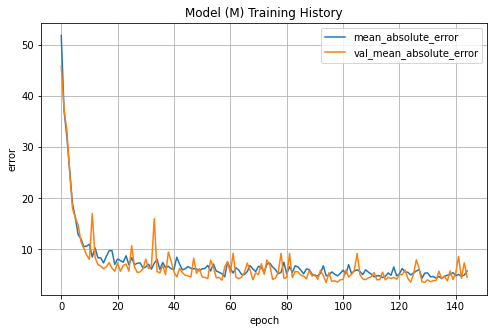

In [35]:
#del history.history["loss"]
#del history.history["val_loss"]
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("epoch")
plt.ylabel('error')
plt.title("Model (M) Training History")
plt.grid(True)
plt.show

In [64]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 1.9235e-08 - mean_absolute_error: 0.0120


[1.9235152137753175e-08, 0.011954731307923794]

In [65]:
ans = model.predict(np.expand_dims(x_test[0],axis=0))

In [68]:
model.save('model/model_v.h5')